### Task 3 : Iris Flower Classification

Importing required modules

In [47]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Loading data

In [2]:
dataset = pd.read_csv("IRIS.csv")
data = dataset.copy()

Data inspection

In [3]:
data.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Data summary statistics

In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Pre-processing EDA

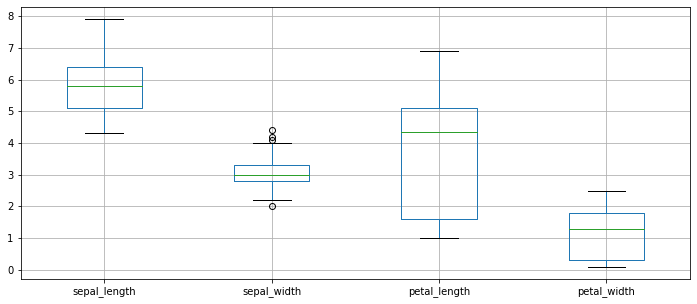

In [6]:
plt.figure(figsize=(12,5))
data.boxplot()
plt.show()

Data pre-processing 

In [7]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


- Scaling numerical data

In [8]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

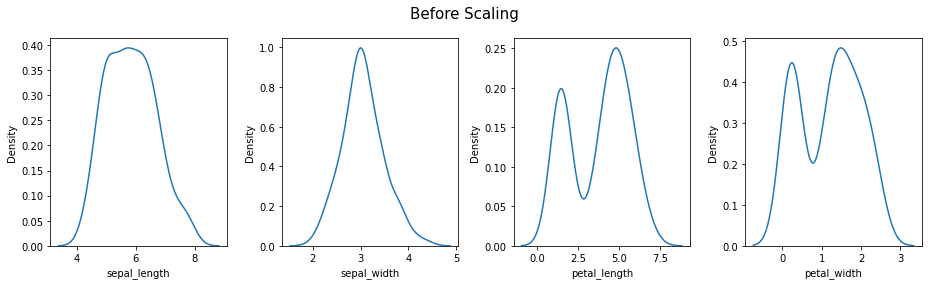

In [12]:
plt.figure(figsize=(13,4))
for i in range(len(columns)):
    plt.subplot(1,4,i+1)
    sns.kdeplot(x=data[columns[i]])
plt.suptitle("Before Scaling", fontsize=15)
plt.tight_layout()

In [13]:
pipeline = Pipeline([
    ("Standard scaler",StandardScaler()),
    ("Robust scaler", RobustScaler())
])

In [14]:
data[columns] = pipeline.fit_transform(data[columns])

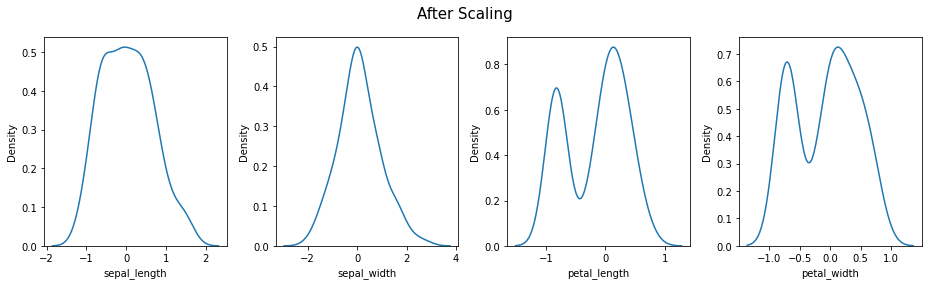

In [15]:
plt.figure(figsize=(13,4))
for i in range(len(columns)):
    plt.subplot(1,4,i+1)
    sns.kdeplot(x=data[columns[i]])
plt.suptitle("After Scaling", fontsize=15)
plt.tight_layout()

Data Splitting 

In [16]:
X = data.drop(columns=["species"])
y = data["species"]
X.shape, y.shape

((150, 4), (150,))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

Model Selection

- Model training

In [20]:
#Linear regresssion model
linear_model = LogisticRegression().fit(X_train, y_train)

#Random forest model
rf_model = RandomForestClassifier().fit(X_train, y_train)

#Gradient boosting model
gb_model = GradientBoostingClassifier().fit(X_train, y_train)

- Making predictions

In [21]:
#Linear regresssion predictions
linear_preds = linear_model.predict(X_test)

#Random forest predictions
rf_preds = rf_model.predict(X_test)

#Gradient boosting predictions
gb_preds = gb_model.predict(X_test)

Model Evaluation 

In [58]:
def evaluate(model_name, y_preds, y_test=y_test):
    # Error Metrics
    acc = accuracy_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds,average="weighted" )
    precision = precision_score(y_test, y_preds,average="weighted" )
    f1 = f1_score(y_test, y_preds,average="weighted" )
    print(f"Model : {model_name}")
    print(f'accuracy_score: {acc:.2f}')
    print(f'recall_score: {recall:.2f}')
    print(f'precision_score: {precision:.2f}')
    print(f'f1_score: {f1:.2f}\n')
    print(f"Confusion matrix: \n{confusion_matrix(y_test, y_preds)}")
    print("\nClassification report:")
    print(classification_report(y_test, y_preds))

In [59]:
evaluate("Linear regression",linear_preds)

Model : Linear regression
accuracy_score: 0.92
recall_score: 0.92
precision_score: 0.93
f1_score: 0.92

Confusion matrix: 
[[15  1  0]
 [ 0  8  1]
 [ 0  1 12]]

Classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.94      0.97        16
Iris-versicolor       0.80      0.89      0.84         9
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.92        38
      macro avg       0.91      0.92      0.91        38
   weighted avg       0.93      0.92      0.92        38



In [60]:
evaluate("random forest",rf_preds)

Model : random forest
accuracy_score: 0.95
recall_score: 0.95
precision_score: 0.95
f1_score: 0.95

Confusion matrix: 
[[16  0  0]
 [ 0  8  1]
 [ 0  1 12]]

Classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.95        38
      macro avg       0.94      0.94      0.94        38
   weighted avg       0.95      0.95      0.95        38



In [61]:
evaluate("gradient boosting", gb_preds)

Model : gradient boosting
accuracy_score: 0.95
recall_score: 0.95
precision_score: 0.95
f1_score: 0.95

Confusion matrix: 
[[16  0  0]
 [ 0  8  1]
 [ 0  1 12]]

Classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.95        38
      macro avg       0.94      0.94      0.94        38
   weighted avg       0.95      0.95      0.95        38



Conclusion 

- Random forest and Gradient boosting are giving the best results